**Objetivos da aula:**

*   Conhecer o espaço de cor HSV
*   Conhecer o processo de mascara
*   conhecer o processo de detecção de contornos
*   conhecer o processo de calculo do centro de massa
*   conhecer o processo para desenar e escrever na imagem

### Espaço de cor HSV

Até agora, trabalhamos com espaços de cor como RGB, BGR e escala de cinza, que são intuitivos, mas limitados para certas tarefas de visão computacional. 

Vamos explorar o `espaço de cor HSV` (`Hue, Saturation, Value`), utilizado em aplicações como segmentação de objetos em robótica, reconhecimento de gestos e análise de vídeos.

- `Hue (Matiz)`: Representa a "cor pura" (ex.: vermelho, azul), medida em graus (0° a 359°). É o que define o tipo de cor que percebemos.
- `Saturation (Saturação)`: Indica a intensidade ou pureza da cor, em porcentagem (0% = cinza, 100% = cor vibrante).
- `Value (Brilho)`: Determina a luminosidade da cor (0% = preto, 100% = brilho máximo).


**Por que HSV é útil?** Diferente do RGB, onde as componentes são fortemente correlacionadas (mudanças de luz afetam todas), o HSV separa a cor (Hue) da iluminação (Value), facilitando a segmentação em condições variáveis de luz.

![](lab_images/hsv_colorspace.png)

Dica: Pra entender bem o que é cada componente, [da uma olhada neste link](https://www.google.com/search?q=colorpicker&oq=colorpi&aqs=chrome.0.69i59j69i57j0l6j0i10l2.1862j0j7&sourceid=chrome&ie=UTF-8)
 ou digita no google `colorpicker`.
 
**lembrete super importante!! O OpenCV trabalha com valores de 8bits (0-255), ou seja o valor de Hue (Matriz) tem que ser divido por 2 (0 - 179). Os valores Saturação e Brilho variam de 0 - 255**
 

### Conversão para HSV e Máscaras

No OpenCV, converter uma imagem de BGR para HSV é simples: `cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)`. 

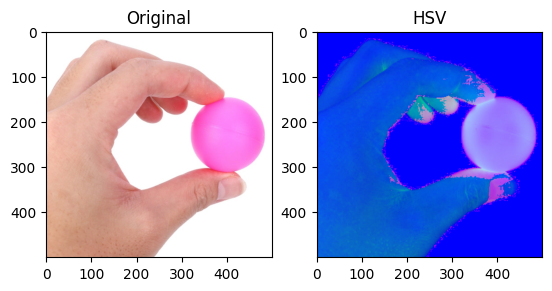

In [112]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/bolinha.png')

# Converte para RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
# Converte para HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Exibe os resultados
plt.subplot(1, 2, 1)
plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(img_hsv); plt.title("HSV")
plt.show()

Com a imagem em HSV, podemos definir uma mascara para o magenta. 

Obter o valor ideal de mascara de primeira é complicado, será necessário um processo iterativo. Por isso começamos com um valor inicial. 

Por exemplo: O pixel (200,400) pertence a bolinha que estamos buscando segmentar:

- O valor RGB dele é [255 132 249]. 
- Em `HSV` o valor é `[151 123 255]`.

Ótimo, já temos nosso chute inicial, vamos criar uma mascara para garantir que o valor que encontramos inicialmente está contido dentro dele.

In [113]:
# Exibe o valor do pixel 200,400
print(img_rgb[200,400])

h,s,v = img_hsv[200,400]
print(h,s,v)




[255 132 249]
151 123 255


Agora, podemos criar uma máscaras para isolar cores específicas, definindo intervalos de HSV. Isso é feito com `cv2.inRange()`, que retorna uma imagem binária onde os pixels dentro do intervalo são brancos (255) e os fora são pretos (0).

```python
cv2.inRange(image_hsv, lower, upper)
```
onde:
- image_hsv é a imagem no espaço de cor HSV
- lower é o valor mínimo de cada canal
- upper é o valor máximo de cada canal


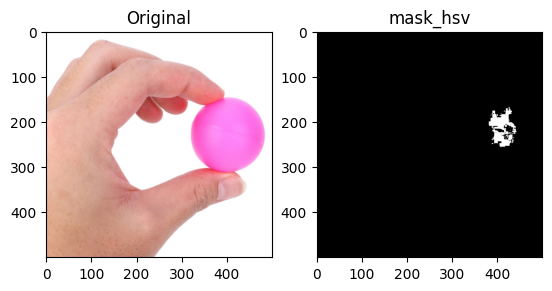

In [114]:
# Definição dos valores minimo e max da mascara
# o magenta tem h=151, vamos considerar de 150 a 152
# o magenta tem s=123. Vamos considerar de 120 a 125
# o magenta tem v=255. Vamos considerar de 250 a 255
                            # H    S    V
image_lower_hsv = np.array([150, 120, 250])  
image_upper_hsv = np.array([152, 125, 255])

# Cria a mascara
mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

# Exibe os resultados
plt.subplot(1, 2, 1)
plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv,cmap='gray'); plt.title("mask_hsv")
plt.show()


Deu quase certo, mas tem algumas partes que não foram detectadas


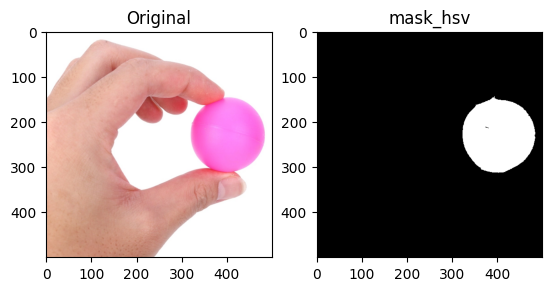

In [115]:
# vamos tentar melhorar a mascara
image_lower_hsv = np.array([140, 100, 200])
image_upper_hsv = np.array([175, 255, 255])


mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

# Exibe os resultados
plt.subplot(1, 2, 1)
plt.imshow(img_rgb); plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv2,cmap='gray'); plt.title("mask_hsv")
plt.show()

#### DESAFIO 1

Faça a segmentação da meia lua da imagem `"melancia.png"`. 


![](lab_images/segmenta.png)

Dica: talvez você precise usar mais que uma faixa de valores. Se necessário use a função `cv2.bitwise_or` para juntar as partes. 

o cv2.bitwise_or é um operador que faz a operação OR bit a bit entre duas imagens. onde a imagem resultante é 1 se pelo menos um dos pixels for 1.

[  1 159 221]


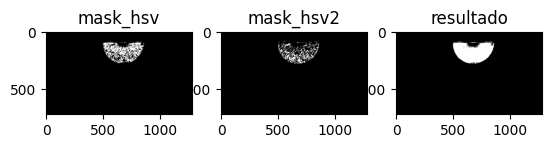

In [116]:
#Implemente seu código


%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/melancia.png')

# Converte para RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
# Converte para HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

print(img_hsv[120,800])
#                             # [179 168 245]
image_lower_hsv = np.array([170, 150, 200])  
image_upper_hsv = np.array([180, 255, 255])


#                             # [1 159 221]
image_lower_hsv2 = np.array([0, 150, 180])  
image_upper_hsv2 = np.array([20, 255, 255])

# Cria a mascara
mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)
mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)


# # juntando as duas mascaras
resultado = cv2.bitwise_or(mask_hsv, mask_hsv2)

# Exibe os resultados
plt.subplot(1, 3, 1)
plt.imshow(mask_hsv,cmap='gray'); plt.title("mask_hsv")
plt.subplot(1, 3, 2)
plt.imshow(mask_hsv2,cmap='gray'); plt.title("mask_hsv2")
plt.subplot(1, 3, 3)
plt.imshow(resultado,cmap='gray'); plt.title("resultado")
plt.show()

# plt.imshow(mask_hsv2,cmap="gray")



#### DESAFIO 2

Agora, Recupere a cor original da imagem antes de aplicar a filtragem.

![](lab_images/segmenta2.png)


Dica: Use as funções de `cv2.bitwise_and` para combinar as máscaras e a imagem original.

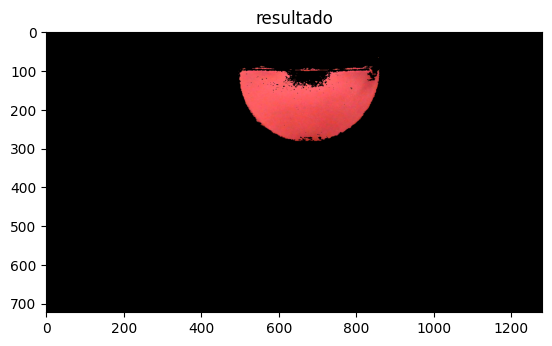

In [117]:
#Implemente seu código

#recupenrando a cor da melancia
res = cv2.bitwise_and(img_rgb,img_rgb, mask=resultado)


plt.subplot(1, 1, 1)
plt.imshow(res); plt.title("resultado")
plt.show()

### DETECÇÃO DE CONTORNOS

Para realizar a detecção dos contornos, ou bordas de um objeto, usamos a função `cv2.findContours`. 

A função recebe uma `imagem binária` como entrada, onde os objetos a serem detectados devem ser brancos e o fundo preto.

**Parâmetros**:

```python
contornos, hierarquia= cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
```

- `Primeiro parâmetro`: imagem fonte (binária)
- `Segundo parâmetro`: modo de recuperação de contornos
- `Terceiro parâmetro`: método de aproximação de contornos

A função retorna duas variáveis: 

- `Contornos`: uma `lista` Python de todos os contornos na imagem. Cada contorno individual é representado como um `array NumPy` de coordenadas (x,y) dos pontos de borda do objeto.
- `Hierarquia`: informação sobre a relação entre os contornos (opcional)


**Modos de recuperação**: Determinam como os contornos são estruturados e organizados hierarquicamente:

- `RETR_EXTERNAL`:

    - Recupera apenas os contornos externos mais externos.
    - Ignora quaisquer contornos dentro de outros contornos.
    - Útil quando você só está interessado nos limites externos dos objetos.

- `RETR_LIST`:
    
    - Recupera todos os contornos, mas não estabelece nenhuma relação hierárquica entre eles.
    - Todos os contornos são tratados no mesmo nível.
    - Ideal para análise simples de formas quando a hierarquia não é importante.

- `RETR_CCOMP`:
    - Cria uma hierarquia de dois níveis.
    - O primeiro nível contém contornos externos.
    - O segundo nível contém contornos de buracos dentro dos objetos.
    - Útil para objetos com buracos, como letras (A, B, D).

- `RETR_TREE`:
    - Recupera todos os contornos e cria uma hierarquia completa de contornos aninhados.
    - Mapeia todas as relações pai-filho entre contornos.
    - Ideal para análise de estruturas complexas com múltiplos níveis de aninhamento.

ref: Saiba mais em [https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html](https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html)


**Métodos de aproximação**: Determinam a quantidade de pontos usados para representar o contorno:

- `CHAIN_APPROX_NONE`:
    - Armazena todos os pontos do contorno sem simplificação.
    - Precisão máxima para análises detalhadas
    - Consome mais memória (ideal para formas complexas/irregulares)

- `CHAIN_APPROX_SIMPLE`:
    - remove pontos redundantes
    - Economiza memória
    - Ideal para formas geométricas simples


Após a detecção, os contornos podem ser desenhados na imagem original usando a função `cv2.drawContours`, permitindo a visualização dos objetos detectados

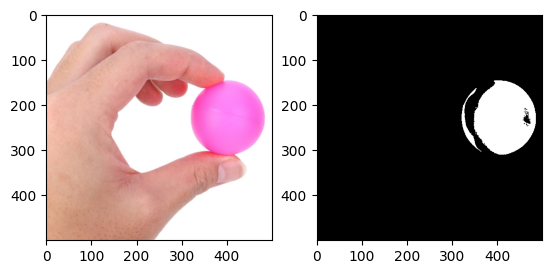

In [118]:
#recarregando o nosso exemplo...

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/bolinha.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([130, 50, 100])  
image_upper_hsv = np.array([170, 150, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)



plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()


In [119]:
# realizando o contorno da imagem

# contornos_none, hierar = cv2.findContours(mask_hsv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# print(f'Nenhuma aproximação: {len(contornos_none[0])} pontos')  

contornos_simple, _ = cv2.findContours(mask_hsv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f'Aproximação SIMPLE: {len(contornos_simple)} contornos') 

# print(hierar)
# len(contornos_none)


Aproximação SIMPLE: 5 contornos


In [120]:
len(contornos_simple)

5

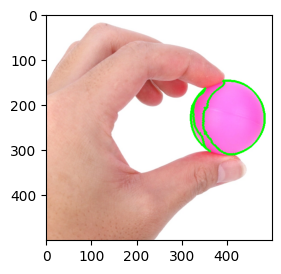

In [121]:
#Desenhando os contornos sobre a imagem original
# img_contornos_none = img_rgb.copy() #cria uma cópia da imagem
# cv2.drawContours(img_contornos_none, contornos_none, -1, (0,255,0), 3)

img_contornos_simple = img_rgb.copy()
cv2.drawContours(img_contornos_simple, contornos_simple, -1, (0,255,0), 3)

# plt.subplot(1, 2, 1)
# plt.imshow(img_contornos_none)
plt.subplot(1, 2, 2)
plt.imshow(img_contornos_simple)
plt.show()

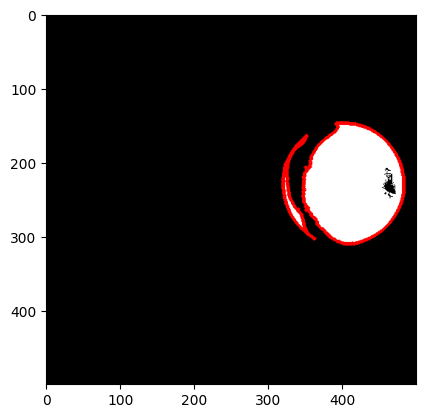

In [122]:
# Desenhando os contornos sobre a mascara

contornos_img = mask_hsv.copy() # Cópia da máscara para ser desenhada "por cima"
contornos_img = cv2.cvtColor(contornos_img, cv2.COLOR_GRAY2RGB) # Converte a máscara para RGB

cv2.drawContours(contornos_img, contornos_simple, -1, [255, 0, 0], 3);


plt.imshow(contornos_img);

(-0.5, 499.5, 499.5, -0.5)

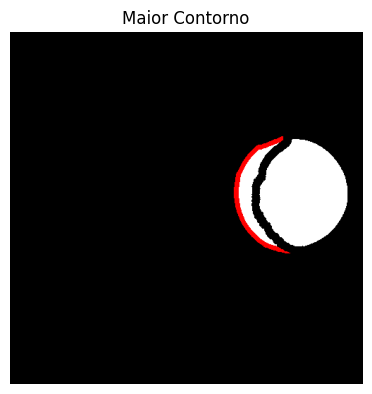

In [132]:
sorted_contours = sorted(contornos_simple, key=cv2.contourArea, reverse= True)

quantidade_contornos = 1


# Desenha o contorno de maior área na imagem original
img_contour_max = contornos_img.copy()

cv2.drawContours(img_contour_max, sorted_contours[:quantidade_contornos], -1, (0, 0, 0), 10)

# Exibe a imagem original e a imagem com o contorno de maior área
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_contour_max)
plt.title('Maior Contorno')
plt.axis('off')

Aproximação SIMPLE: 5 contornos
415 229


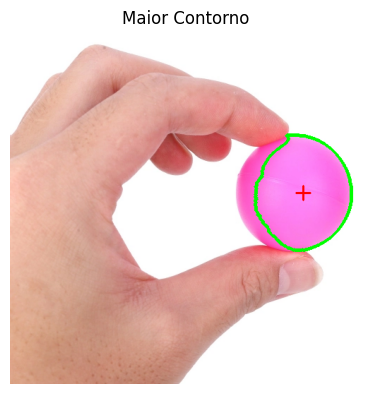

In [143]:
#recarregando o nosso exemplo...

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/bolinha.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([130, 50, 100])  
image_upper_hsv = np.array([170, 150, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)



contornos_simple, _ = cv2.findContours(mask_hsv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f'Aproximação SIMPLE: {len(contornos_simple)} contornos') 

# cv2.drawContours(img_contornos_simple, contornos_simple, -1, (0,255,0), 3)


sorted_contours = sorted(contornos_simple, key=cv2.contourArea, reverse= True)

quantidade_contornos = 1


img_contornos_simple = img_rgb.copy()
# Desenha o contorno de maior área na imagem original
# img_contour_max = contornos_img.copy()

cv2.drawContours(img_contornos_simple, sorted_contours[:quantidade_contornos], -1, (0, 255, 0), 3)


# ---- calcula o centor de massa do contorno

momento = cv2.moments(sorted_contours[0])

cx = int(momento['m10']/momento['m00'])
cy = int(momento['m01']/momento['m00'])

print(cx,cy)

## desenha o centro de massa na imagem
cv2.circle(img_contornos_simple, (cx, cy), 2, (255, 0, 0), -1)
size = 10
cv2.line(img_contornos_simple, (cx-size, cy), (cx+size, cy), (255, 0, 0), 2) ## horizontal
cv2.line(img_contornos_simple, (cx, cy-size), (cx, cy+size), (255, 0, 0), 2) ## vertical

# Exibe a imagem original e a imagem com o contorno de maior área
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_contornos_simple)
plt.title('Maior Contorno')
plt.axis('off')
plt.show()


Note que a função findContours retorna uma lista com os contornos detectados. 

In [123]:
print("Quantidade de contornos encontrado: ", len(contornos_simple))

print(len(contornos_simple[0]))
print(len(contornos_simple[1]))
print(len(contornos_simple[2]))
print(len(contornos_simple[3]))
print(len(contornos_simple[4]))

Quantidade de contornos encontrado:  5
2
1
2
144
246


#### DESAFIO 3

Usando a imagem `formas.png`, faça um script que detecta todos os contornos da imagem. O resultado deve ser parecido com o exemplo a seguir:

![](lab_images/formas-res.png)

Dica: Neste desafio, basicamente tem que ajustar a mascara, o resto não muda.

In [124]:
#Implemente seu código





### **Cálculo da Área dos Contornos com `cv2.contourArea()`**

Muitas vezes não conseguimos uma mascara robusta o suficiente para detectar apenas o contorno que estamos buscando, uma estratégia utilizada é filtrar a quantidade de objetos detectados por sua área. A função `cv2.contourArea()` é usada para calcular a área (em pixels) de um contorno específico. Isso é útil, por exemplo, para filtrar contornos pequenos (ruídos) ou identificar o maior contorno em uma imagem, que pode representar o objeto principal de interesse.

#### **Como funciona?**
- A função `cv2.contourArea(contour)` recebe um contorno (um array retornado por `cv2.findContours()`) como entrada e retorna a área em pixels.
- A área é calculada com base teorema de Green [referencia aqui](https://pt.wikipedia.org/wiki/Teorema_de_Green), que usa as coordenadas dos pontos do contorno.


#### **Por que usar?**
- Filtrar contornos indesejados (ex.: eliminar ruídos com áreas pequenas).
- Encontrar o maior contorno, que pode ser o objeto principal em uma segmentação.
- Comparar tamanhos de diferentes objetos na imagem.


**Referência da documentação:**

- [https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html](https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html)
- [https://medium.com/@aleozlx/the-maths-behind-contour-moments-from-opencv-491e5c348b91](https://medium.com/@aleozlx/the-maths-behind-contour-moments-from-opencv-491e5c348b91)

**Maior área**

Podemos encontrar a maior área, varrendo a lista de contornos para identificar o indice.

```python
max_area = 0
max_index = -1
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_index = i

cv2.drawContours(img_contour_max, [contours[max_index]], -1, (0, 0, 0), 10)
```
**usando max()**

Usando a função `max()` do python com a lista de contornos. A função é aplicada para recuperar o maior contorno, usamos a key cv2.contourArea que é uma função que retorna a área de um contorno.

```python
maior_contorno = max(contours, key = cv2.contourArea)
cv2.drawContours(img_contour_max, maior_contorno, -1, (0, 0, 0), 10)
```

**Ordenação de Contornos por área**

Extrair o maior contorno funcionou bem, mas às vezes estamos interessados ​​em mais de um contorno de uma lista classificada de contornos. Nesses casos, a função `sorted()` pode ser usada. A função sorted() também aceita o parâmetro de key opcional que usamos como antes para retornar a área de cada contorno. Então os contornos são ordenados com base na área e uma é lista ordenada é retornada. Também especificamos a ordem `reverse = True`, ou seja, em ordem decrescente do tamanho da área.

```python
sorted_contours = sorted(contours, key=cv2.contourArea, reverse= True)

quantidade_contornos = 2 # quantidade de contornos desejada
cv2.drawContours(img_contour_max, sorted_contours[:quantidade_contornos], -1, (0, 0, 0), 10)
```

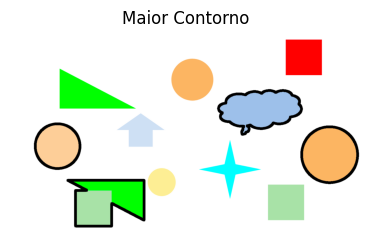

In [125]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('lab_images/formas.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define as faixas de cor para o vermelho no espaço HSV
lower_hsv = np.array([0, 1, 1])
upper_hsv = np.array([180, 255, 255])

# Cria as máscaras
edges = cv2.inRange(img_hsv, lower_hsv, upper_hsv)

# Encontra os contornos na imagem
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

### o findContours devolve uma lista de contornos, a ideia é varrer esses contornos e encontrar a maior area e maior index
 
sorted_contours = sorted(contours, key=cv2.contourArea, reverse= True)

quantidade_contornos = 4

# Desenha o contorno de maior área na imagem original
img_contour_max = img_rgb.copy()

cv2.drawContours(img_contour_max, sorted_contours[:quantidade_contornos], -1, (0, 0, 0), 10)

# Exibe a imagem original e a imagem com o contorno de maior área
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_contour_max)
plt.title('Maior Contorno')
plt.axis('off')


plt.show()



#### DESAFIO 3

Detectar os 3 maiores contornos da imagem `formas.png`.

In [126]:
## Implemente seu código





### **Cálculo do Centro de Massa com `cv2.moments()`**

É comum em aplicações práticas da industria querer saber onde está o "centro" de um objeto na imagem. Esse ponto é chamado de **centro de massa** (ou centroid) e representa a média ponderada das coordenadas dos pixels que formam o contorno ou a região segmentada. Na OpenCV, usamos a função `cv2.moments()` para calcular essas propriedades geométricas.

#### **O que é o centro de massa?**

- O centro de massa é um ponto (x, y) que indica o "centro médio" de uma forma ou região.
- Ele é útil para rastrear objetos, marcar posições ou alinhar elementos em uma imagem.
- Em visão computacional, frequentemente usamos o centro de massa para representar a localização de um objeto segmentado.

#### **Como funciona?**
- A função `cv2.moments(contour)` calcula os momentos de um contorno. Os momentos são valores matemáticos que descrevem propriedades como área, posição e orientação.
- Os momentos mais importantes para o centro de massa são:
  - `m00`: Área total (número de pixels do contorno).
  - `m10`: Soma das coordenadas x (ponderada pelos pixels).
  - `m01`: Soma das coordenadas y (ponderada pelos pixels).
- O centro de massa é calculado como:
  - $ cx = \frac{m10}{m00} $ (coordenada x)
  - $ cy = \frac{m01}{m00} $ (coordenada y)


- [https://en.wikipedia.org/wiki/Image_moment](https://en.wikipedia.org/wiki/Image_moment)
- [https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html](https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html)


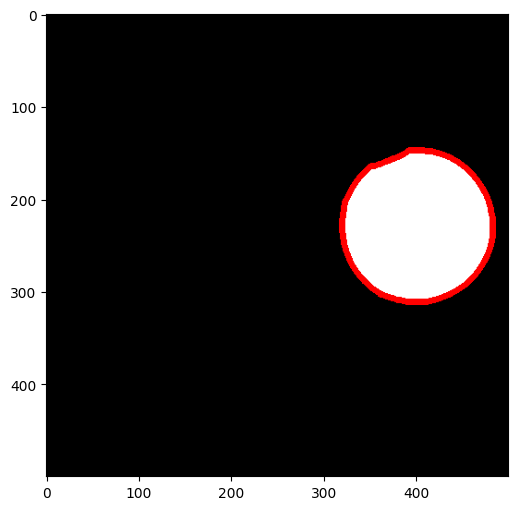

In [127]:
#recarregando o nosso exemplo...

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/bolinha.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([140, 50, 100])  
image_upper_hsv = np.array([170, 255, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

In [ ]:
# usando o exemplo da documentação 
# notamos que a função devolve um dicionario. 

cnt = contornos[0]

M = cv2.moments(cnt)
print( M )

{'m00': 20954.5, 'm10': 8414785.5, 'm01': 4813317.5, 'm20': 3414210172.083333, 'm11': 1932427931.625, 'm02': 1140509199.0833333, 'm30': 1399201096317.6501, 'm21': 783868070420.7833, 'm12': 457787216119.7167, 'm03': 278003040454.85004, 'mu20': 35049847.99971104, 'mu11': -475946.1051416397, 'mu02': 34874354.26211333, 'mu30': -7672941.9208984375, 'mu21': -4968840.380795479, 'mu12': 6858123.621509552, 'mu03': 2822544.575317383, 'nu20': 0.07982364109512664, 'nu11': -0.0010839348312655414, 'nu02': 0.07942396606302501, 'nu30': -0.00012071706132489804, 'nu21': -7.817390189392743e-05, 'nu12': 0.00010789766667418762, 'nu03': 4.4406603113053444e-05}


In [ ]:
# Calculo das coordenadas do centro de massa

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)

centro de massa na possição:  401 229


 Vamos plotar isso na imagem para saber se esta correto. A função `cv2.line` vai nos ajudar a desenhar uma cruz. e função `cv2.putText` a escrever na imagem as coordenadas.

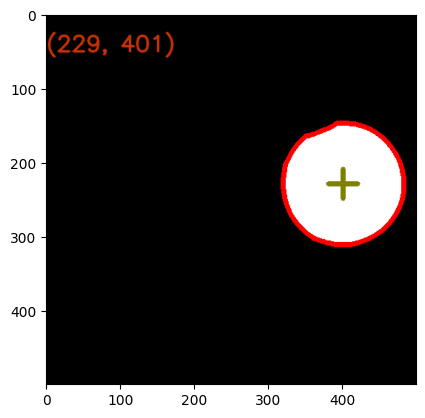

In [ ]:
## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (0,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img);

#### DESAFIO 4

O desafio é juntar o que aprendemos no processamento de imagem em um video. 

Você deve seguimentar a cor de um objeto, encontrar seu contorno e montar a imagem segmentada com o centro de massa e suas coordenadas. 

Use a sua webcam para processar em tempo real ou um video de sua preferência.

In [ ]:
#### seu código aqui...




### **Técnica de Agrupamento para Segmentação: K-means**

Até agora, segmentamos imagens definindo intervalos de cores manualmente no espaço HSV com `cv2.inRange()`. No entanto, nem sempre sabemos exatamente quais cores queremos segmentar, ou pode ser difícil definir esses intervalos para objetos com variações de cor. 

Uma alternativa é usar **K-means**, uma técnica de agrupamento que segmenta a imagem automaticamente com base em características dos pixels, como suas cores.

#### **O que é K-means?**
- K-means é um algoritmo de aprendizado não supervisionado que agrupa dados em $( K $) clusters (grupos) com base em suas similaridades.
- No contexto de segmentação de imagens, cada pixel é tratado como um ponto em um espaço de características (ex.: valores RGB ou HSV), e o algoritmo os organiza em $( K $) grupos distintos.
- O resultado é uma imagem segmentada onde cada cluster representa uma região com cores semelhantes.

#### **Como funciona?**
1. Escolha o número $( K $) de clusters (quantas regiões você quer segmentar).
2. Inicialize $( K $) centros (centróides) aleatoriamente no espaço de características.
3. Atribua cada pixel ao centróide mais próximo (baseado na distância Euclidiana).
4. Atualize os centróides calculando a média dos pixels atribuídos a cada cluster.
5. Repita os passos 3 e 4 até que os centróides não mudem mais (convergência).

#### **Parâmetros do K-means:**
- `criteria`: Define quando o algoritmo para (máximo de iterações ou precisão).
    - `cv2.TERM_CRITERIA_EPS`: Parar quando a precisão desejada (epsilon) for atingida.
    - `cv2.TERM_CRITERIA_MAX_ITER`: Parar após um número máximo de iterações.
    - `100`: Número máximo de iterações.
    - `0.2`: Precisão desejada (epsilon).
- `k`: Número de clusters (ex.: 3 regiões distintas).
- `cv2.KMEANS_RANDOM_CENTERS`: Inicializa os centróides aleatoriamente.

#### **Por que usar K-means para segmentação?**
- Automatiza a segmentação sem precisar definir intervalos de cor manualmente.
- Útil para imagens complexas com várias cores ou transições suaves.
- Pode ser combinado com outras técnicas (como contornos) para análise mais avançada.

**referência**: 
- [https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html](https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html)

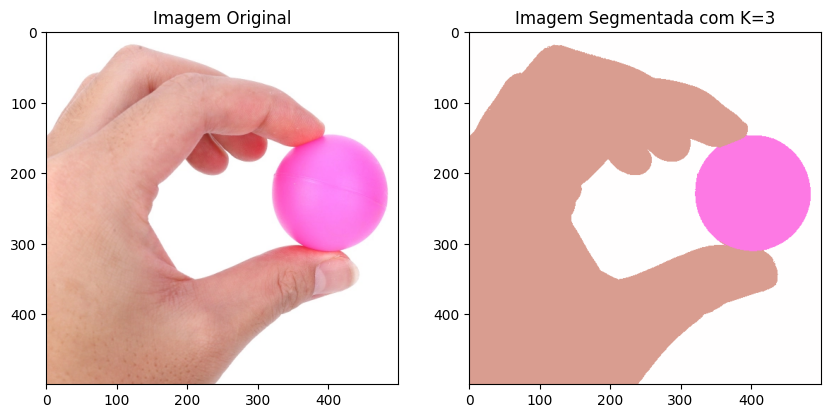

In [157]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image = cv2.imread('lab_images/bolinha.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imagem_rgb = image.copy()

# Redimensionar a imagem para um formato 2D (pixels x canais)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values) # Conversão para float32 para o k-means funcionar corretamente 

# Aplicar K-means
k = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reconstruir a imagem segmentada
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)


# Exibir a imagem original e a imagem segmentada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f'Imagem Segmentada com K={k}')
plt.show()

Ótimo! Conseguimos encontrar os clusters de forma automatica usando kmeans.
Para encontrar segmentar a nossa bolinha falta apenas filtrar o clusters. 

**Mas como sabemos qual é o cluster se refere a qual cor?**

Vamos visualizar o conteúdo de cada cluster. 

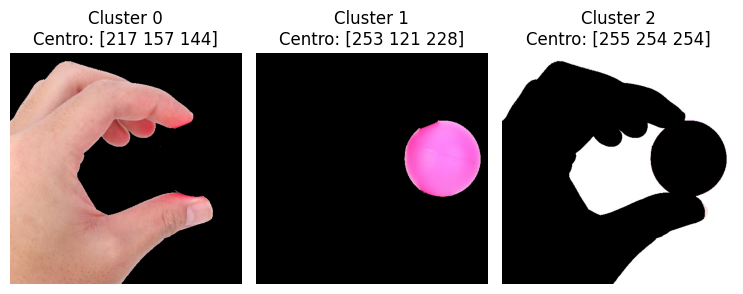

In [158]:
# Mostrar cada cluster
plt.figure(figsize=(10, 5))

for i in range(k):
    mascara = (labels.reshape(imagem_rgb.shape[0], imagem_rgb.shape[1]) == i)
    mascara = np.uint8(mascara) * 255 # 255 nos pixels que pertencem ao cluster
   
    segmentada = imagem_rgb.copy()
    segmentada[mascara == 0] = 0  # Pixels fora do cluster ficam pretos
    
    # Exibir a imagem segmentada do cluster
    plt.subplot(1, k + 1, i + 2)
    plt.imshow(segmentada)
    plt.title(f'Cluster {i}\nCentro: {centers[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Agora que conhecemos o que representa cada cluster, podemos aplicar o `findContours` para encontrar o maior contorno e o centro de massa.

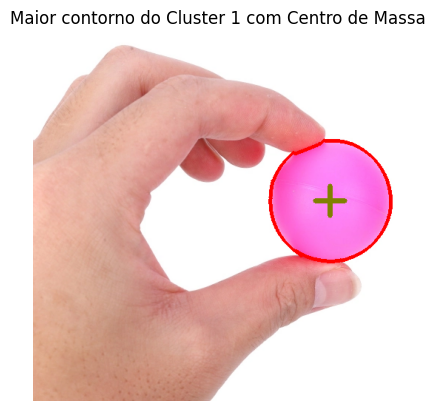

In [160]:
# Após a segmentação com K-means

cluster = 1
mascara = (labels.reshape(imagem_rgb.shape[0], imagem_rgb.shape[1]) == cluster)
mascara = np.uint8(mascara) * 255
size = 20
# Encontrar contornos na máscara do cluster
contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(contornos) > 0:
    maior_contorno = max(contornos, key=cv2.contourArea)
    momentos = cv2.moments(maior_contorno)
    if momentos['m00'] != 0:
        cx = int(momentos['m10'] / momentos['m00'])
        cy = int(momentos['m01'] / momentos['m00'])
        
        # Desenhar na imagem original
        resultado = imagem_rgb.copy()
        cv2.drawContours(resultado, [maior_contorno], -1, (255, 0, 0), 3)
        cv2.line(resultado,(cx - size,cy),(cx + size,cy),(128,128,0),5)
        cv2.line(resultado,(cx,cy - size),(cx, cy + size),(128,128,0),5)
  
        
        plt.imshow(resultado)
        plt.title(f'Maior contorno do Cluster {cluster} com Centro de Massa')
        plt.axis('off')
        plt.show()


Sabemos que o K-Means é um algoritmo sensível à inicialização, o que significa que a ordem dos clusters pode variar a cada execução. Para garantir que a segmentação identifique corretamente apenas a bolinha, independentemente da ordem dos clusters, precisamos de um critério confiável para selecionar o cluster correto.

Para resolver esse problema, podemos usar a distância Euclidiana entre uma cor de referência e cada centróide. Dessa forma, conseguimos identificar automaticamente o cluster mais próximo da cor desejada, garantindo uma segmentação consistente.

Centróides dos clusters (RGB):
Cluster 0: [255 254 254]
Cluster 1: [253 121 228]
Cluster 2: [217 157 144]
[255 132 249]
Cluster mais próximo da cor [200. 132. 249.]: 1
(250000, 1)
(500, 500, 3)


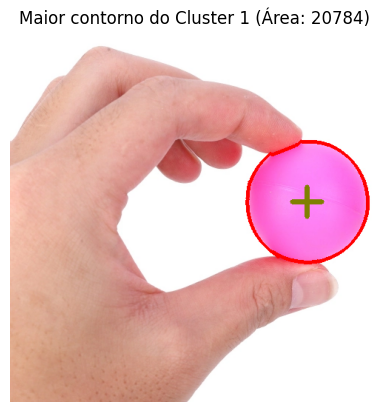

In [147]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

imagem = cv2.imread('lab_images/bolinha.png')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
pixels = imagem_rgb.reshape((-1, 3))
pixels = np.float32(pixels)

# Definir critérios e número de clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

print("Centróides dos clusters (RGB):")
for i, centro in enumerate(centers):
    print(f"Cluster {i}: {centro}")

# valor do pixel bolinha para definir a referencia
print(imagem_rgb[200,400])

cor_referencia = np.array([200, 132, 249], dtype=np.float32)

# Calcular a distância Euclidiana entre a cor de referência e cada centróide
distancias = []
for centro in centers:
    distancia = np.sqrt(np.sum((cor_referencia - centro) ** 2))  # Calcula a distância Euclidiana
    distancias.append(distancia) 
cluster_desejado = np.argmin(distancias)  # Cluster mais próximo da cor de referência
print(f"Cluster mais próximo da cor {cor_referencia}: {cluster_desejado}")

print(labels.shape), print(imagem_rgb.shape)

# Criar máscara para o cluster desejado
mascara = (labels.reshape(imagem_rgb.shape[:2]) == cluster_desejado).astype(np.uint8) * 255

# Encontrar contornos na máscara
contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Processar o maior contorno, se existir
if len(contornos) > 0:
    maior_contorno = max(contornos, key=cv2.contourArea)
    area = cv2.contourArea(maior_contorno)
    
    # Calcular centro de massa
    momentos = cv2.moments(maior_contorno)
    if momentos['m00'] != 0:
        cx = int(momentos['m10'] / momentos['m00'])
        cy = int(momentos['m01'] / momentos['m00'])
        
        # Desenhar na imagem original
        resultado = imagem_rgb.copy()
        cv2.drawContours(resultado, [maior_contorno], -1, (255, 0, 0), 3)
        cv2.line(resultado,(cx - size,cy),(cx + size,cy),(128,128,0),5)
        cv2.line(resultado,(cx,cy - size),(cx, cy + size),(128,128,0),5)
        
        # Exibir resultado
        plt.imshow(resultado)
        plt.title(f'Maior contorno do Cluster {cluster_desejado} (Área: {area:.0f})')
        plt.axis('off')
        plt.show()
else:
    print("Nenhum contorno encontrado no cluster selecionado.")